<a href="https://colab.research.google.com/github/rldckd0103/pdm02/blob/master/py-pandas/pandas_3_harnessing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [2]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6)
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# head()
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-09-28,0.471435,-1.190976,1.432707,-0.312652
2020-09-29,-0.720589,0.887163,0.859588,-0.636524
2020-09-30,0.015696,-2.242685,1.150036,0.991946
2020-10-01,0.953324,-2.021255,-0.334077,0.002118
2020-10-02,0.405453,0.289092,1.321158,-1.546906
2020-10-03,-0.202646,-0.655969,0.193421,0.553439




---



### 데이터 재구성(setting) 또는 확장

In [4]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20200928', periods=6))
s1

2020-09-28    1
2020-09-29    2
2020-09-30    3
2020-10-01    4
2020-10-02    5
2020-10-03    6
Freq: D, dtype: int64

In [5]:
df['F'] = s1

In [6]:
df  # 기존 df의 구조에 맞춰서 확장, 재구성됨.

,A,B,C,D,F
2020-09-28,0.471435,-1.190976,1.432707,-0.312652,1
2020-09-29,-0.720589,0.887163,0.859588,-0.636524,2
2020-09-30,0.015696,-2.242685,1.150036,0.991946,3
2020-10-01,0.953324,-2.021255,-0.334077,0.002118,4
2020-10-02,0.405453,0.289092,1.321158,-1.546906,5
2020-10-03,-0.202646,-0.655969,0.193421,0.553439,6


#### Setting data by label

> **at, iat**

- at : label을 이용하여 값 지정
- iat: index를 이용하여 값 지정

In [7]:
# Setting values by label:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2020-09-28,0.000000,-1.190976,1.432707,-0.312652,1
2020-09-29,-0.720589,0.887163,0.859588,-0.636524,2
2020-09-30,0.015696,-2.242685,1.150036,0.991946,3
2020-10-01,0.953324,-2.021255,-0.334077,0.002118,4
2020-10-02,0.405453,0.289092,1.321158,-1.546906,5
2020-10-03,-0.202646,-0.655969,0.193421,0.553439,6


In [8]:
# Setting values by position (index):
df.iat[0,1] = 0
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,-0.312652,1
2020-09-29,-0.720589,0.887163,0.859588,-0.636524,2
2020-09-30,0.015696,-2.242685,1.150036,0.991946,3
2020-10-01,0.953324,-2.021255,-0.334077,0.002118,4
2020-10-02,0.405453,0.289092,1.321158,-1.546906,5
2020-10-03,-0.202646,-0.655969,0.193421,0.553439,6


In [9]:
# Important properties of DataFrame
len(df), df.shape, df.size

(6, (6, 5), 30)

In [10]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


### Missing data 처리
> pandas primarily uses the value **np.nan** to represent missing data. 
- dropna()
- fillna()
- isna()

In [11]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [12]:
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


In [13]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,NaN
2020-09-29,-0.720589,0.887163,0.859588,5,2,NaN
2020-09-30,0.015696,-2.242685,1.150036,5,3,NaN
2020-10-01,0.953324,-2.021255,-0.334077,5,4,NaN


In [15]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,1.0
2020-09-29,-0.720589,0.887163,0.859588,5,2,1.0
2020-09-30,0.015696,-2.242685,1.150036,5,3,NaN
2020-10-01,0.953324,-2.021255,-0.334077,5,4,NaN


## Drop missing data from DataFrame

In [16]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,1.0
2020-09-29,-0.720589,0.887163,0.859588,5,2,1.0


In [20]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,1.0
2020-09-29,-0.720589,0.887163,0.859588,5,2,1.0
2020-09-30,0.015696,-2.242685,1.150036,5,3,5.0
2020-10-01,0.953324,-2.021255,-0.334077,5,4,5.0


In [21]:
# Get the boolean mask where values are nan.
pd.isna(df1)    # NaN을 찾음

,A,B,C,D,F,E
2020-09-28,False,False,False,False,False,False
2020-09-29,False,False,False,False,False,False
2020-09-30,False,False,False,False,False,True
2020-10-01,False,False,False,False,False,True




---



### 데이터 통계 (Statistics)

In [22]:
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


In [23]:
df.mean()

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [ ]:
df.mean(0)

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [ ]:
df.mean(1)

2020-09-28    1.486541
2020-09-29    1.605233
2020-09-30    1.384609
2020-10-01    1.519598
2020-10-02    2.403141
2020-10-03    2.066961
Freq: D, dtype: float64

In [ ]:
df.std(0) #, df.std(1)

A    0.565658
B    1.271236
C    0.699548
D    0.000000
F    1.870829
dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-09-28 to 2020-10-03
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      int64  
 4   F       6 non-null      int64  
dtypes: float64(3), int64(2)
memory usage: 448.0 bytes


#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D,F

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# 노트북 셀 내에 그림 출력 (Jupyter notebook or lab)
# %matplotlib inline

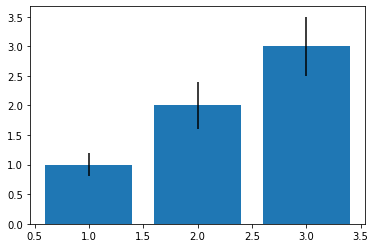

In [33]:
# 막대그래프(bar graph)를 그린다.
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(1,len(bar_labels)+1))
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

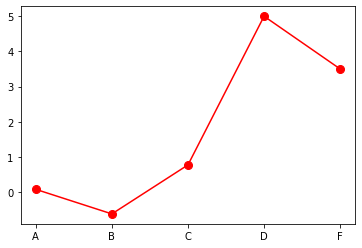

In [34]:
plt.plot(df.mean(0), '-ro', ms=8)

In [36]:
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


In [ ]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


<BarContainer object of 5 artists>

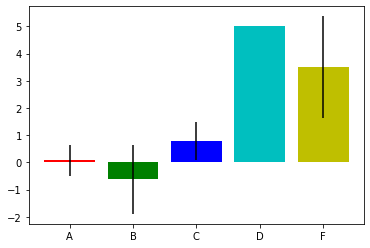

In [ ]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')

***